In [1]:
import numpy as np
import pandas as pd
import os
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pio.templates.default = "simple_white"

# import csv as dataframe
df = pd.read_csv(os.path.abspath('stats_and_tables/MPEA_dataset_for_stats.csv'))
df_rt = df[df['PROPERTY: Test temperature ($^\circ$C)'] == 25]
df

Unnamed: 0 REFERENCE: tag                REFERENCE: doi_x  \
0              0              4      10.1016/j.jmmm.2014.07.023   
1              1              4      10.1016/j.jmmm.2014.07.023   
2              2              4      10.1016/j.jmmm.2014.07.023   
3              3              4      10.1016/j.jmmm.2014.07.023   
4              4              4      10.1016/j.jmmm.2014.07.023   
...          ...            ...                             ...   
1604         955           J135   10.1080/02670836.2018.1446267   
1605         956        J135-18    10.1016/j.matlet.2015.08.099   
1606         957        J135-19  10.1179/1743284715Y.0000000032   
1607         958        J135-24   10.1016/j.actamat.2012.11.032   
1608         959        J135-24   10.1016/j.actamat.2012.11.032   

                   FORMULA PROPERTY: Type of phases  \
0       Al0.25 Co1 Fe1 Ni1                      FCC   
1        Al0.5 Co1 Fe1 Ni1                  FCC+BCC   
2       Al0.75 Co1 Fe1 Ni1                  FCC+BCC   
3          Al1 Co1 Fe1 Ni1                      BCC   
4              Co1 Fe1 Ni1                      FCC   
...                    ...                      ...   
1604       Al1 Nb1 Ti1 Zr1              B2 + Zr5Al3   
1605  Al1 Nb1 Ti1 V1 Zr0.5                      NaN   
1606       Al1 Nb1 Ti1 Zr1                      NaN   
1607        Nb1 Ti1 V1 Zr1                      NaN   
1608       Cr1 Nb1 Ti1 Zr1                      NaN   

     PROPERTY: Single/Multiphase PROPERTY: synthesis method  \
0                              S                         AC   
1                              M                         AC   
2                              M                         AC   
3                              S                         AC   
4                              S                         AC   
...                          ...                        ...   
1604                           M                          A   
1605                         NaN                        NaN   
1606                         NaN                        NaN   
1607                         NaN                        NaN   
1608                         NaN                        NaN   

      PROPERTY: grain size ($\mu$m)  PROPERTY: ROM Density (g/cm$^3$)  \
0                               NaN                               7.9   
1                               NaN                               7.4   
2                               NaN                               7.0   
3                               NaN                               6.6   
4                               NaN                               8.5   
...                             ...                               ...   
1604                            NaN                               NaN   
1605                            NaN                               NaN   
1606                            NaN                               NaN   
1607                            NaN                               NaN   
1608                            NaN                               NaN   

      PROPERTY: HV  ...                                   REFERENCE: title  \
0            138.0  ...  Effects of Al and Si addition on the structure...   
1            212.0  ...  Effects of Al and Si addition on the structure...   
2            385.0  ...  Effects of Al and Si addition on the structure...   
3            456.0  ...  Effects of Al and Si addition on the structure...   
4            125.0  ...  Effects of Al and Si addition on the structure...   
...            ...  ...                                                ...   
1604         418.0  ...  Microstructure and mechanical properties of a ...   
1605           NaN  ...  An AlNbTiVZr0.5 high-entropy alloy combining h...   
1606         539.6  ...  Effect of Al on structure and mechanical prope...   
1607         335.0  ...  Low-density, refractory multi-principal elemen...   
1608         418.0  ...  Low-density, refractory

/Users/chrisborg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



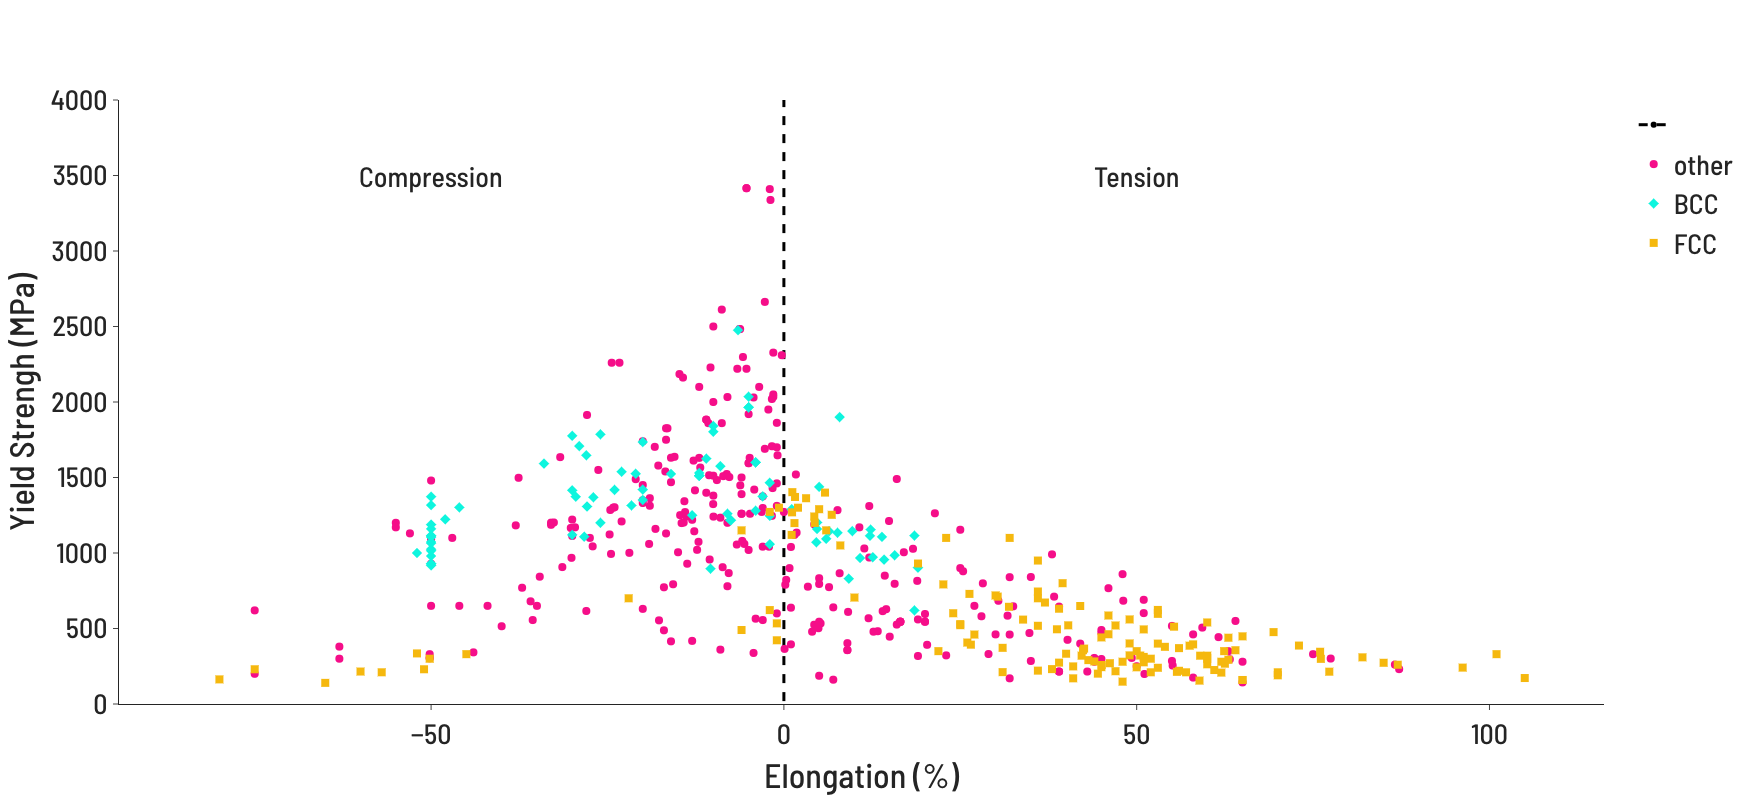

In [2]:
df_e = df_rt

def apply_neg_elong(row):
    
    val = row['PROPERTY: Elongation (%)']
    
    if np.isnan(val):
        return val
    else:
        if row['PROPERTY: Type of test'] == 'C':
            return -val
        else:
            return val

df_e['PROPERTY: Elongation (%)'] = df_e.apply(apply_neg_elong, axis=1)
df_e_BCC = df_e[df_e['PROPERTY: BCC/FCC/other'] == 'BCC']
df_e_FCC = df_e[df_e['PROPERTY: BCC/FCC/other'] == 'FCC']
df_e_other = df_e[df_e['PROPERTY: BCC/FCC/other'] == 'other']

fig = go.Figure()
fig.update_layout(font=dict(family="Barlow Semi Condensed", size=28))
fig.update_layout(xaxis_title='Elongation (%)', yaxis_title='Yield Strengh (MPa)', width=1000, height=800)

fig.add_trace(go.Scatter(x=[0,0], y=[-100, 4100], line = dict(color='black', width=3, dash='dash'), name=''))

fig.add_trace(go.Scatter(x=df_e_other["PROPERTY: Elongation (%)"], y=df_e_other["PROPERTY: YS (MPa)"], 
                         mode='markers', marker_color='#f50e89', marker_size=8, marker_symbol='circle', name='other'))

fig.add_trace(go.Scatter(x=df_e_BCC["PROPERTY: Elongation (%)"], y=df_e_BCC["PROPERTY: YS (MPa)"], 
                         mode='markers', marker_color='#0ef5de', marker_size=8, marker_symbol='diamond', name='BCC'))

fig.add_trace(go.Scatter(x=df_e_FCC["PROPERTY: Elongation (%)"], y=df_e_FCC["PROPERTY: YS (MPa)"], 
                         mode='markers', marker_color='#f5b80e', marker_size=8, marker_symbol='square', name='FCC'))
fig['layout']['yaxis'].update(range=[0, 4000], autorange=False)

fig.update_layout(
    annotations=[
        dict(
            x=-50,
            y=3500,
            text="Compression",
            ax=0,
            ay=0
        ),
         dict(
            x=50,
            y=3500,
            text="Tension",
            ax=0,
            ay=0
        )
    ])



# fig['layout']['xaxis'].update(range=[-100, 200], autorange=False)
fig.write_image("figures/ys_scatter.pdf", scale=1)
fig.show()

/Users/chrisborg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chrisborg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



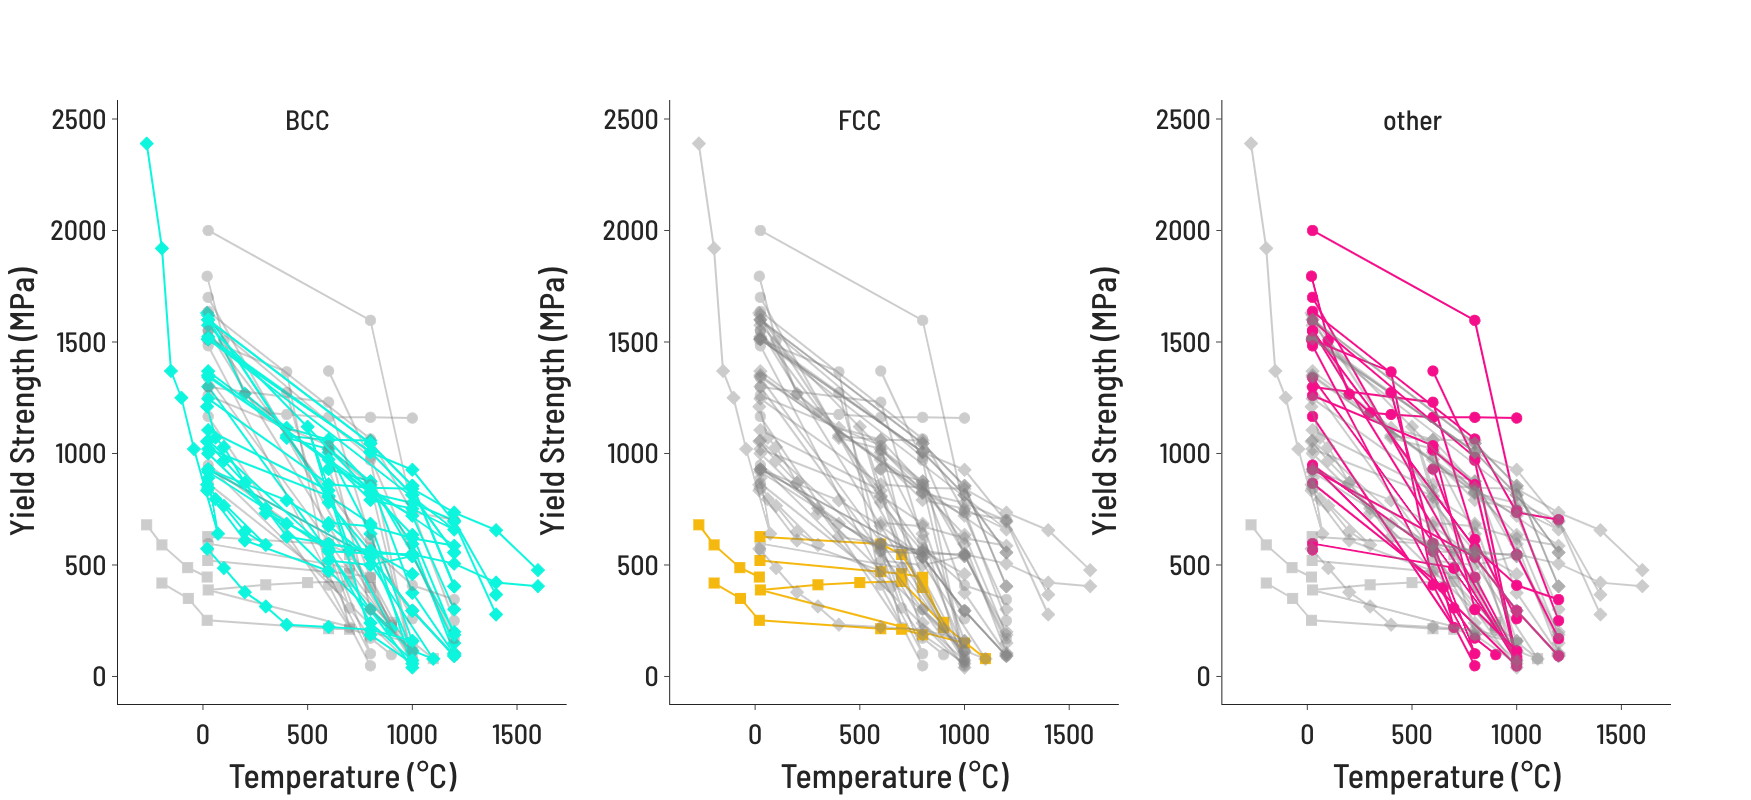

In [3]:
fig = make_subplots(rows=1, cols=3)

y = 'PROPERTY: YS (MPa)'
x = 'PROPERTY: Test temperature ($^\circ$C)'

df_ys = df.dropna(subset=[x,y])
#df_ys = df[df[x]>0]

grey = 'grey'
blue = '#0ef5de'
yellow = '#f5b80e'
magenta = '#f50e89'

bcc_marker = dict(color = grey, size = 10, line = dict(color = grey, width = 1), symbol='diamond')
bcc_bold_marker = dict(color = blue, size = 10, line = dict(color = blue, width = 1), symbol='diamond')

fcc_marker = dict(color = grey, size = 10, line = dict(color = grey, width = 1), symbol='square')
fcc_bold_marker = dict(color = '#f5b80e', size = 10, line = dict(color = yellow, width = 1), symbol='square')


other_marker = dict(color = grey, size = 10, line = dict(color = grey, width = 1), symbol='circle')
other_bold_marker = dict(color = magenta, size = 10, line = dict(color = magenta, width = 1), symbol='circle')
        
samples = df_ys.groupby(['FORMULA', 'PROPERTY: synthesis method', 'PROPERTY: BCC/FCC/other',  'REFERENCE: doi'])



for s in samples:
    temps = s[1]['PROPERTY: Test temperature ($^\circ$C)']
    if len(s[1]) > 3 and len(temps.unique()) > 1:
        phase = s[1]['PROPERTY: BCC/FCC/other'].values[0]
        doi = s[1]['REFERENCE: doi'].values[0]
        sm = s[1]['PROPERTY: synthesis method'].values[0]
        hovertext=s[1]['FORMULA']

        if phase == 'BCC':
            if doi == '10.1016/j.msea.2017.10.073' and sm == 'CR':
                s[1][x] = s[1][x][::2].dropna().reset_index()
                s[1][y] = s[1][y][::2].dropna().reset_index()

            fig.add_trace(go.Scatter(x=s[1][x], y=s[1][y], marker=bcc_bold_marker, mode='lines+markers', hovertext=hovertext), row=1, col=1)
            fig.add_trace(go.Scatter(x=s[1][x], y=s[1][y], marker=bcc_marker, opacity=0.4, mode='lines+markers', hovertext=hovertext), row=1, col=2)
            fig.add_trace(go.Scatter(x=s[1][x], y=s[1][y], marker=bcc_marker, opacity=0.4, mode='lines+markers', hovertext=hovertext), row=1, col=3)
            
        if phase == 'FCC':
            fig.add_trace(go.Scatter(x=s[1][x], y=s[1][y], marker=fcc_bold_marker,  mode='lines+markers', hovertext=hovertext), row=1, col=2)
            fig.add_trace(go.Scatter(x=s[1][x], y=s[1][y], marker=fcc_marker, opacity=0.4, mode='lines+markers', hovertext=hovertext), row=1, col=1)
            fig.add_trace(go.Scatter(x=s[1][x], y=s[1][y], marker=fcc_marker, opacity=0.4, mode='lines+markers', hovertext=hovertext), row=1, col=3)
            
        if phase == 'other':
            #print(s[0], len(s[1]), temps)

            fig.add_trace(go.Scatter(x=s[1][x], y=s[1][y], marker=other_marker, opacity=0.4, mode='lines+markers', hovertext=hovertext), row=1, col=1)
            fig.add_trace(go.Scatter(x=s[1][x], y=s[1][y], marker=other_marker, opacity=0.4,  mode='lines+markers', hovertext=hovertext), row=1, col=2)
            fig.add_trace(go.Scatter(x=s[1][x], y=s[1][y], marker=other_bold_marker, mode='lines+markers', hovertext=hovertext), row=1, col=3)

            
for i in [1,2,3]:
    fig.update_yaxes(title_text='Yield Strength (MPa)', row=1, col=i)
    fig.update_xaxes(title_text='Temperature (°C)', row=1, col=i)
    
fig.update_layout(
    annotations=[
        dict(
            x=500,
            y=2500,
            text="BCC",
            ax=0,
            ay=0,
            xref='x1',
            yref='y1'
        ),
         dict(
            x=500,
            y=2500,
            text="FCC",
            ax=0,
            ay=0,
            xref='x2',
            yref='y2'
        ),
         dict(
            x=500,
            y=2500,
            text="other",
            ax=0,
            ay=0,
            xref='x3',
            yref='y3'
        )
    ])

fig.update_layout(font=dict(family="Barlow Semi Condensed", size=28)) 
fig.update_layout(showlegend=False)
fig.update_layout(width=2400, height=800)
fig.write_image("figures/YS_temp.pdf")
fig.write_html("figures/YS_temp.html")

fig.show()

632
['Li', 'B', 'C', 'Mg', 'Al', 'Si', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Y', 'Zr', 'Nb', 'Mo', 'Pd', 'Ag', 'Sn', 'Nd', 'Hf', 'Ta', 'W', 'Re']
435


/Users/chrisborg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



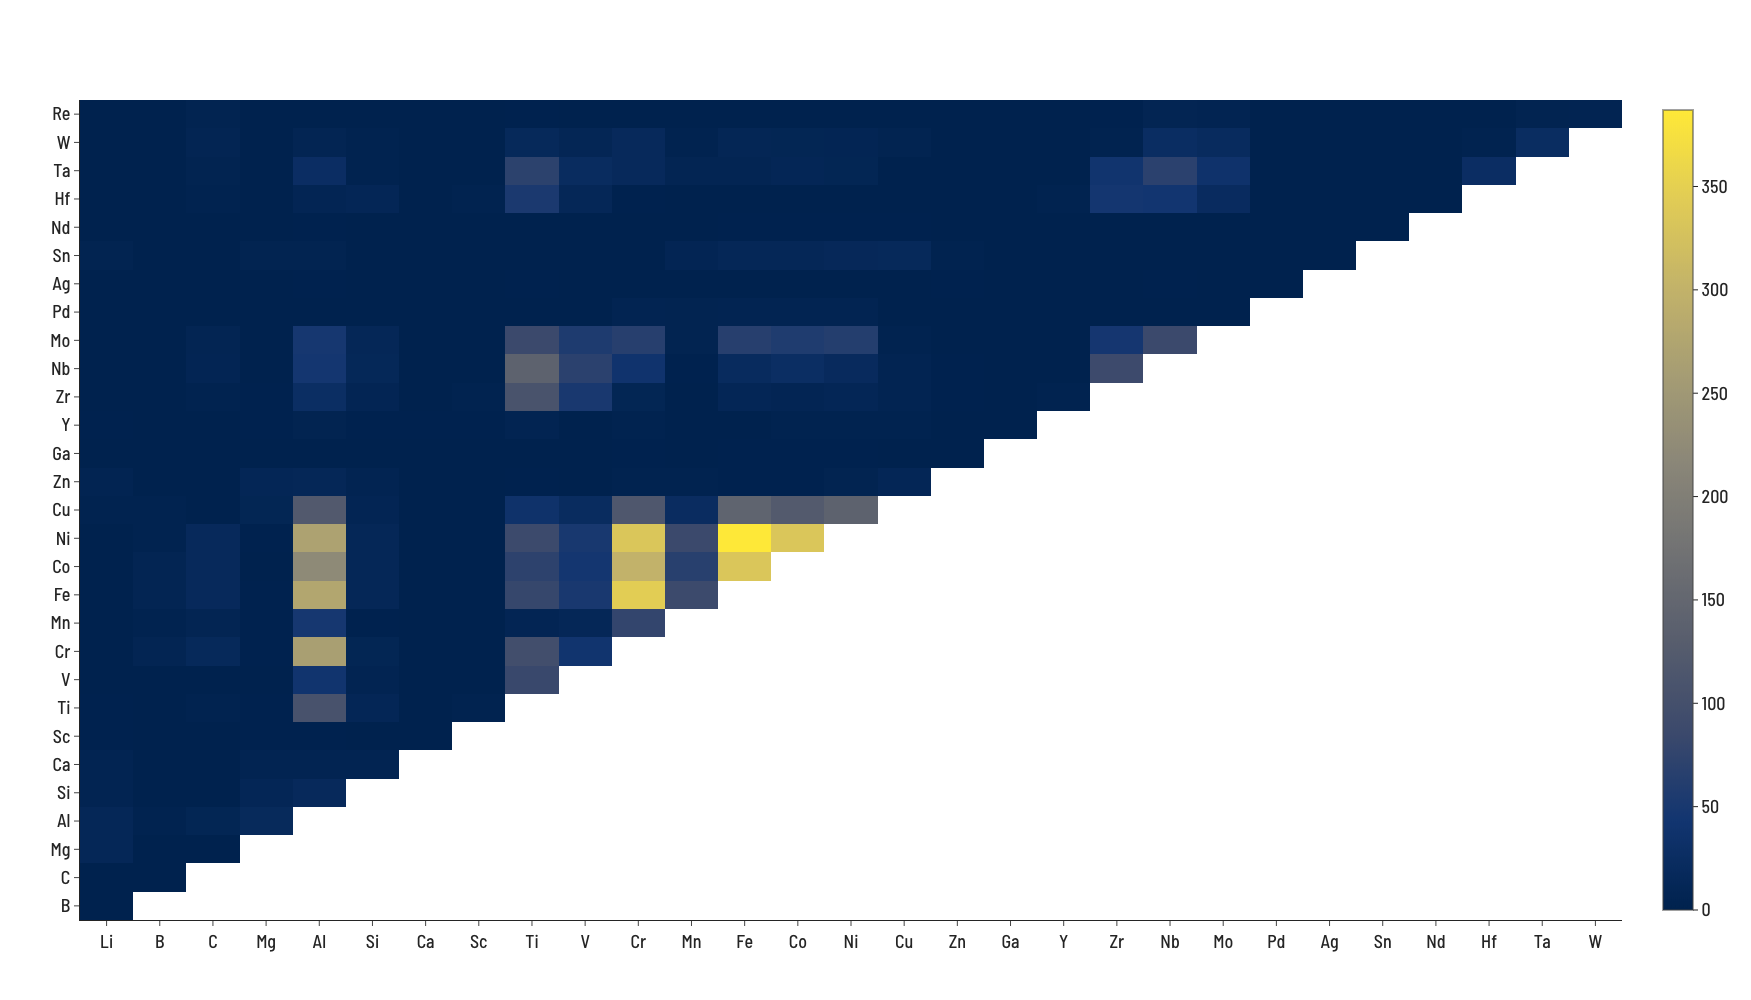

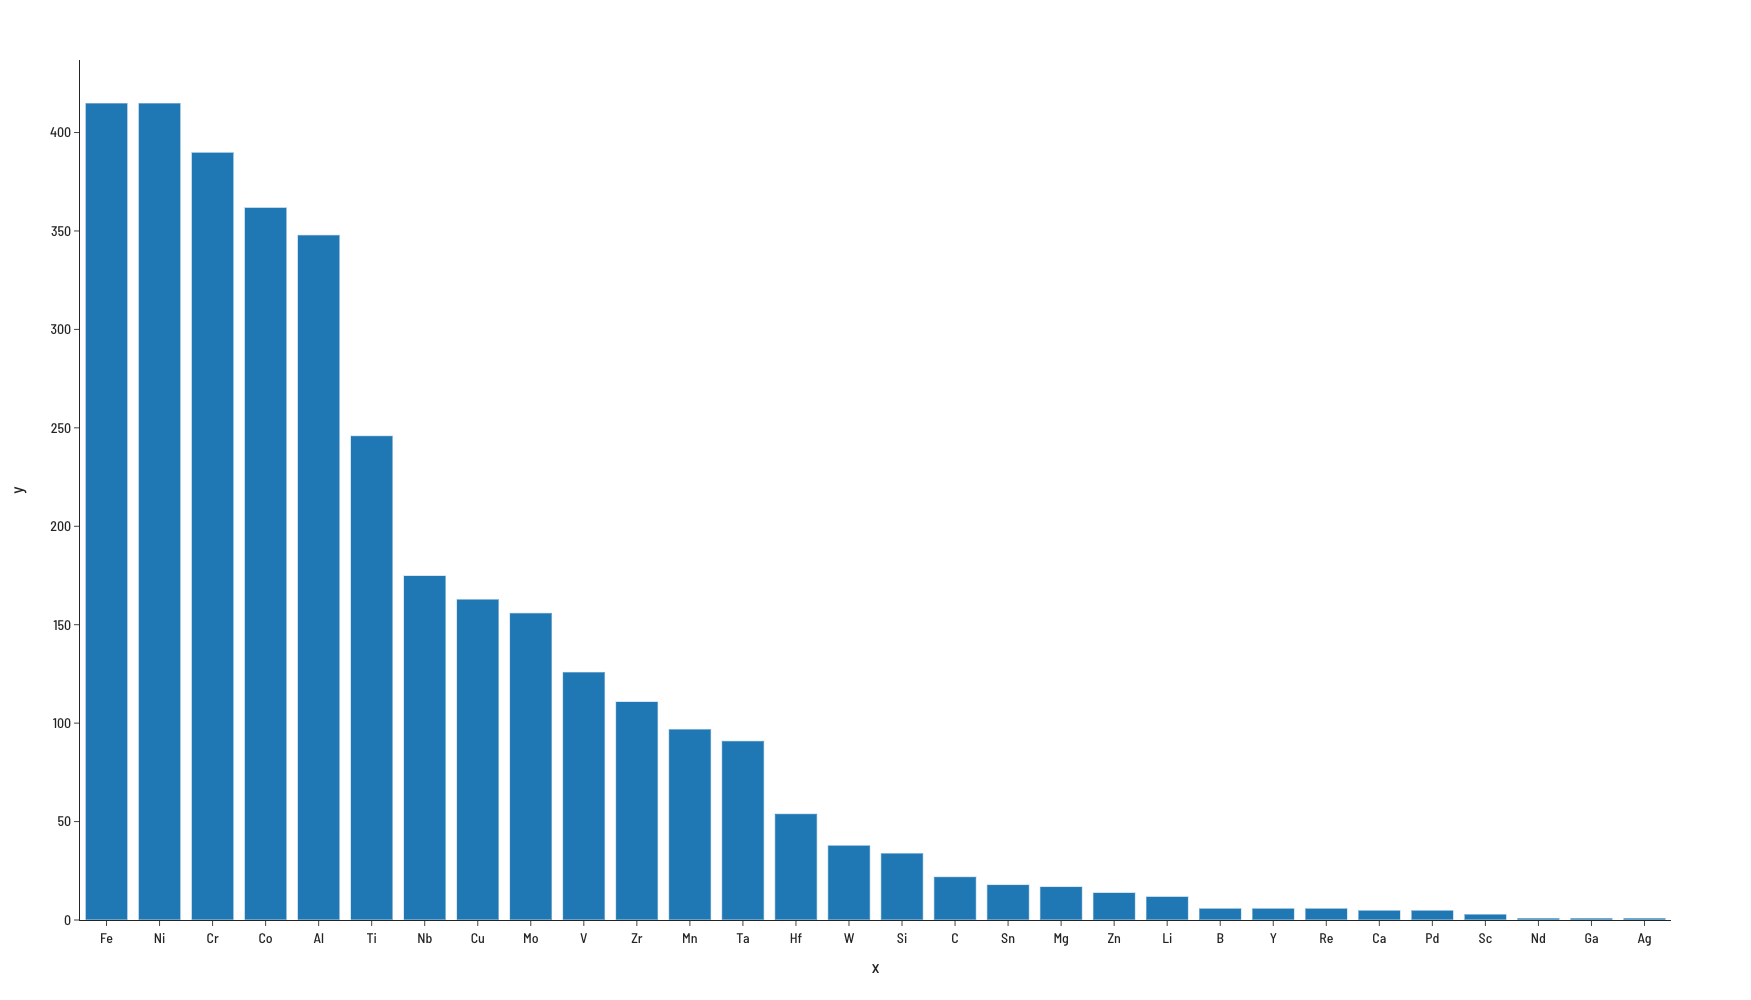

In [4]:
# HEATMAP
# v2 - https://seaborn.pydata.org/examples/many_pairwise_correlations.html

from collections import Counter
from pymatgen import Composition
from pymatgen.core import periodic_table
import itertools


df = df.dropna(subset=['FORMULA'])
df['composition'] = df['FORMULA'].apply(Composition)
df['elements'] = df['FORMULA'].apply(lambda x: Composition(x).elements)
df_unique = df.drop_duplicates(subset='composition')
df_unique['elements'] = df_unique['FORMULA'].apply(lambda x: [str(i) for i in Composition(x).elements])

print(len(df_unique))

total_elements = []
for i in df_unique['elements']:
    total_elements.extend(i)

total_counts = Counter(total_elements).most_common()

all_elements = sorted(list(set(total_elements)))
all_elements = [(x, periodic_table.Element(x).number) for x in all_elements]
all_elements = sorted(all_elements, key=lambda e: e[1])
all_elements = [x[0] for x in all_elements]

print(all_elements)

ele_pairs = list(itertools.combinations(all_elements, 2))

print(len(ele_pairs))

ep_counts = {}
for ep in ele_pairs:
    count = 0 
    for elements in df_unique['elements']:
        if ep[0] in elements and ep[1] in elements:
            count += 1
    ep_counts[ep] = count
    
x = [i[0] for i in ele_pairs]
y = [i[1] for i in ele_pairs]
z = [ep_counts[i] for i in ele_pairs]


fig = go.Figure(data=go.Heatmap(z=z, x=x, y=y, hoverongaps = False, colorscale = 'Cividis'))
fig.update_layout(width=1000, height=1000)
fig.update_layout(font=dict(family="Barlow Semi Condensed", size=18))

fig.update_layout(annotations=[dict(
    x=1.18, 
    align="right", 
    valign="top", 
    text='Number of records containing both elements', 
    showarrow=False, 
    xref="paper", 
    yref="paper", 
    xanchor="right",
    yanchor="middle",
    textangle=90)])

lines = go.Scatter(x=[0, 0.5, 1], y=[0, 0.5, 1], mode='lines', line_color='black', line_width=2.5)


fig.show()
fig.write_image("figures/heatmap.png")


fig = px.bar(x=[i[0] for i in total_counts], y=[i[1] for i in total_counts])
fig.update_layout(font=dict(family="Barlow Semi Condensed", size=14))
fig.update_layout(width=1000, height=1000)
fig.show()